# Part 4 - machine learning

## Linear Regression

In [43]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter
%matplotlib inline

import sklearn
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

pd.options.mode.chained_assignment = None

In [44]:
def replace_to_numeric(df):
    
    le = LabelEncoder()
    df['adrass'] = le.fit_transform(df['adrass']) 
    
    df = df.drop(['date'],axis = 1)
    df = df.drop(['price for meter'],axis = 1)
    
    return df

In [45]:
def target(df, target_column):
    
    TRAINING_FEATURES = df.columns[df.columns != target_column]
    TARGET_FEATURE = target_column

    X = df[TRAINING_FEATURES]
    y = df[TARGET_FEATURE]
    
    return X,y

In [46]:
def train(X,y):

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state= 1)
                       
    return x_train, x_test, y_train, y_test


In [47]:
def train_regression_model(X_train, y_train):
    
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
        
    return regressor

In [48]:
def predict_regression(regressor, X_test):
    
    
    y_pred = regressor.predict(X_test)
    
    return y_pred


In [49]:
def evaluate_performance(y_test,y_predicted):
    
    
    evaluate_value = r2_score(y_test,y_predicted)
                            
    return evaluate_value  


In [50]:
def Details_of_house_for_inspection(model):
    
    print('Enter your address:')
    adrass = input()
    print('Enter your square meters:')
    squre = input()
    print('Enter your num of rooms:')
    rooms = input()
    print('Enter your floor:')
    flor = input()
    print('Enter your year build:')
    year_build = input()
    print('Enter your day sale:')
    Day_sale = input()
    print('Enter your month sale:')
    Month_sale = input()
    print('Enter your year sale:')
    Year_sale = input()

    df = pd.DataFrame({"adrass":adrass,"squre":squre,"num of rooms":rooms,"flor":flor
                       ,"year build":year_build,"Day":Day_sale,"Month":Month_sale,"Year":Year_sale},index=[0])
    
    #df = replace_to_numeric(df)
    le = LabelEncoder()
    df['adrass'] = le.fit_transform(df['adrass']) 
    
    y_pred = predict_regression(model,df)  
    print()
    print("On these dates the value of the house will be: ",int(y_pred[0]))
    #print(int(y_pred[0]))
    
    

In [51]:
df = pd.read_csv(r'/Users/yarinbenbaruch/Desktop/פרויקט סיום - מדעי הנתונים/Ashelim_final.csv')
Ashelim = df.copy()

df = pd.read_csv(r'/Users/yarinbenbaruch/Desktop/פרויקט סיום - מדעי הנתונים/Shikme_final.csv')
Shikme = df.copy()

df = pd.read_csv(r'/Users/yarinbenbaruch/Desktop/פרויקט סיום - מדעי הנתונים/Ramat_Eliyahu_final.csv')
Ramat_Eliyahu = df.copy()

df = pd.read_csv(r'/Users/yarinbenbaruch/Desktop/פרויקט סיום - מדעי הנתונים/Nahalat_Yehuda_final.csv')
Nahalat_Yehuda = df.copy()


# Ashelim

In [52]:
Ashelim = replace_to_numeric(Ashelim)

In [53]:
target_column = 'total price'
X,y = target(Ashelim,target_column)

x_train, x_test, y_train, y_test = train(X,y)

model_Ashelim = train_regression_model(x_train,y_train)

y_pred = predict_regression(model_Ashelim,x_test)

evaluate = evaluate_performance(y_test,y_pred)
print("evaluate =",evaluate)

evaluate = 0.8065781007791576


evaluate = 0.8065781007791576


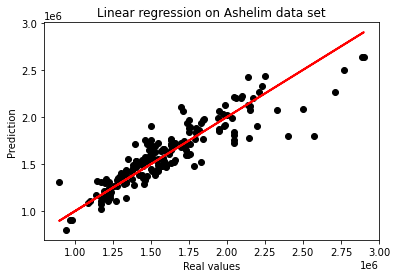

In [54]:
print("evaluate =",evaluate)
plt.scatter(y_test, y_pred, color='black')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.title('Linear regression on Ashelim data set')
plt.xlabel('Real values')
plt.ylabel('Prediction')
plt.show()

## Test - Linear Regression - model_Ashelim

In [55]:
Details_of_house_for_inspection(model_Ashelim)


Enter your address:
הכינור 3
Enter your square meters:
100
Enter your num of rooms:
5
Enter your floor:
4
Enter your year build:
1997
Enter your day sale:
20
Enter your month sale:
2
Enter your year sale:
2020

On these dates the value of the house will be:  2304449


In [59]:
Details_of_house_for_inspection(model_Ashelim)

Enter your address:
הכינור 3
Enter your square meters:
100
Enter your num of rooms:
5
Enter your floor:
4
Enter your year build:
1997
Enter your day sale:
20
Enter your month sale:
2
Enter your year sale:
2025

On these dates the value of the house will be:  2666319


# Shikme

In [260]:
Shikme = replace_to_numeric(Shikme)

In [261]:
target_column = 'total price'
X,y = target(Shikme,target_column)

x_train, x_test, y_train, y_test = train(X,y)

model_Shikme = train_regression_model(x_train,y_train)

y_pred = predict_regression(model_Shikme,x_test)

evaluate = evaluate_performance(y_test,y_pred)
print(evaluate)

0.6526555653051833


## Improve the model

In [263]:
Shikme['num of rooms * flor'] = Shikme['num of rooms'] * Shikme['flor']
Shikme['Year * year build'] = Shikme['year build'] * Shikme['Year']




In [264]:
target_column = 'total price'
X,y = target(Shikme,target_column)

x_train, x_test, y_train, y_test = train(X,y)

model_Shikme = train_regression_model(x_train,y_train)

y_pred = predict_regression(model_Shikme,x_test)

evaluate = evaluate_performance(y_test,y_pred)
print(evaluate)

0.7032307542241244


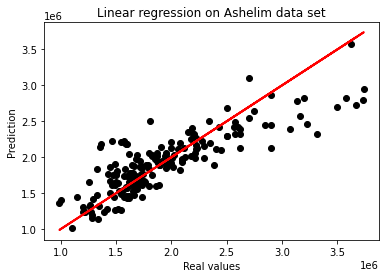

In [265]:
plt.scatter(y_test, y_pred, color='black')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.title('Linear regression on Ashelim data set')
plt.xlabel('Real values')
plt.ylabel('Prediction')
plt.show()

# Ramat_Eliyahu

In [266]:
Ramat_Eliyahu = replace_to_numeric(Ramat_Eliyahu)

In [267]:
target_column = 'total price'
X,y = target(Ramat_Eliyahu,target_column)

x_train, x_test, y_train, y_test = train(X,y)

model_Ramat_Eliyahu = train_regression_model(x_train,y_train)

y_pred = predict_regression(model_Ramat_Eliyahu,x_test)

evaluate = evaluate_performance(y_test,y_pred)
print(evaluate)

0.6013406531956992


## Improve the model

In [268]:
Ramat_Eliyahu['squre * year build'] = Ramat_Eliyahu['year build'] * Ramat_Eliyahu['squre']
Ramat_Eliyahu['num of rooms * flor'] = Ramat_Eliyahu['num of rooms'] * Ramat_Eliyahu['flor']
Ramat_Eliyahu = Ramat_Eliyahu.drop(['Day'],axis = 1)

In [269]:
X,y = target(Ramat_Eliyahu,target_column)

x_train, x_test, y_train, y_test = train(X,y)

model_Ramat_Eliyahu = train_regression_model(x_train,y_train)

y_pred = predict_regression(model_Ramat_Eliyahu,x_test)

evaluate = evaluate_performance(y_test,y_pred)
print(evaluate)

0.6507604191797907


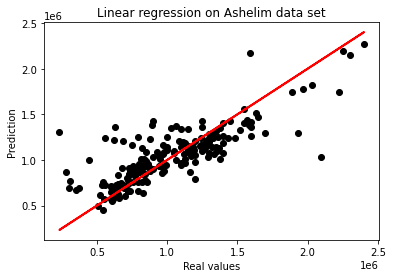

In [270]:
plt.scatter(y_test, y_pred, color='black')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.title('Linear regression on Ashelim data set')
plt.xlabel('Real values')
plt.ylabel('Prediction')
plt.show()

# Nahalat_Yehuda

In [39]:
Nahalat_Yehuda = replace_to_numeric(Nahalat_Yehuda)

In [40]:
target_column = 'total price'
X,y = target(Nahalat_Yehuda,target_column)

x_train, x_test, y_train, y_test = train(X,y)

model_Nahalat_Yehuda = train_regression_model(x_train,y_train)

y_pred = predict_regression(model_Nahalat_Yehuda,x_test)

evaluate = evaluate_performance(y_test,y_pred)
print("Before the improvement",evaluate)

Before the improvement 0.6744622093587438


## Improve the model

In [41]:
Nahalat_Yehuda['Square_meters * Year'] = Nahalat_Yehuda['Year'] * Nahalat_Yehuda['Square meters']
Nahalat_Yehuda['Square_meters * year build'] = Nahalat_Yehuda['year build'] * Nahalat_Yehuda['Square meters']
Nahalat_Yehuda['Num of rooms * Year'] = Nahalat_Yehuda['num of rooms'] * Nahalat_Yehuda['Year']
Nahalat_Yehuda['Num of rooms * floor'] = Nahalat_Yehuda['num of rooms'] * Nahalat_Yehuda['floor']
Nahalat_Yehuda = Nahalat_Yehuda.drop(['Day'],axis = 1)

In [42]:
X,y = target(Nahalat_Yehuda,target_column)

x_train, x_test, y_train, y_test = train(X,y)

model_Nahalat_Yehuda = train_regression_model(x_train,y_train)

y_pred = predict_regression(model_Nahalat_Yehuda,x_test)

evaluate = evaluate_performance(y_test,y_pred)
print("After the improvement",evaluate)

After the improvement 0.724742937409627


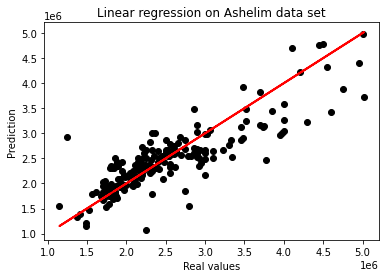

In [275]:
plt.scatter(y_test, y_pred, color='black')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.title('Linear regression on Ashelim data set')
plt.xlabel('Real values')
plt.ylabel('Prediction')
plt.show()